In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gene expression

In [28]:
a_min = 5
a_max = 10
beta = 1
gamma = 0.5
t_switch = 60

In [29]:
n_reactions = 3

reactions = np.array(
    [[1,0],[-1,1],[0,-1]]
)

def alpha(t,t0, alpha_max, alpha_min):
    return alpha_min + (alpha_max-alpha_min)*np.heaviside(t0-t,0.5)


In [34]:
N = 400
SIMULATION_TIME = 100
PRETIME = 30

reaction_rates = np.array([a_min,beta,gamma])

simulations = []
delta_ts = []

for n in range(N):
    t = 0

    concentration = [0,0]

    simulation = []

    while t<SIMULATION_TIME:
        
        if t<PRETIME:
            reaction_rates = np.array([a_min,beta,gamma])
        else:
            reaction_rates = np.array([alpha(t,t_switch, a_max,a_min),beta,gamma])
        #print(np.array([1]+concentration),reaction_rates)
        propensities = np.array([1]+concentration)*reaction_rates
        delta_t = -np.log(1-np.random.random())/sum(propensities) 
        #print(propensities)
        chosen_r = np.random.choice(range(n_reactions), p=propensities/sum(propensities) )
        for j in range(len(concentration)):
            concentration[j] += reactions[chosen_r][j]
        t += delta_t
        if t>=PRETIME:
            simulation += concentration + [t-PRETIME]
            delta_ts.append(delta_t)

    simulations.append( np.array(simulation).reshape(-1,3) )
    

[Text(0,0.5,'concentration'), Text(0.5,0,'time')]

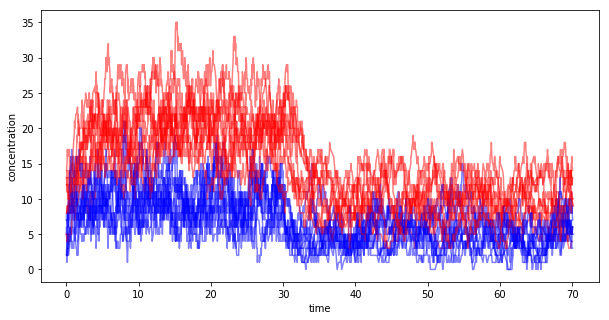

In [35]:
times = np.linspace(0,SIMULATION_TIME,100)
#average_concentrations = reaction_rates[0]/reaction_rates[1]*(1.0-np.exp(-reaction_rates[1]*times))

fig, ax = plt.subplots(figsize=(10,5))

for sim in simulations[1:10]:
    ax.plot(sim[:,2],sim[:,0],alpha=0.5,color='blue')
    ax.plot(sim[:,2],sim[:,1],alpha=0.5,color='red')
ax.set(xlabel='time',ylabel='concentration')

## Steady state distribution 

(0, 30)

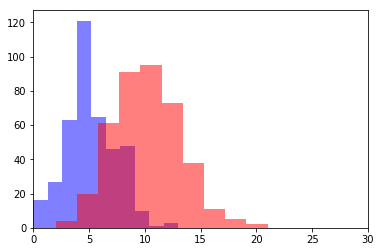

In [36]:
last_data_mrna = []
last_data_protein = []
for sim in simulations:
    last_data_mrna.append(sim[-1,0])
    last_data_protein.append(sim[-1,1])

fig, ax = plt.subplots()
ax.hist(last_data_mrna,bins=10,color='blue',alpha=0.5)
ax.hist(last_data_protein,bins=10,color='red',alpha=0.5)
ax.set_xlim([0,30])

## RNA velocity pattern

AttributeError: module 'seaborn' has no attribute 'scatterplot'

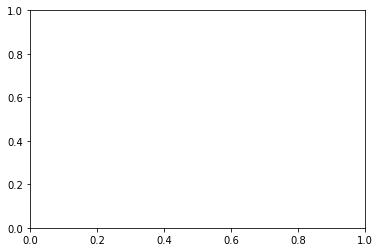

In [37]:
fig, ax = plt.subplots()
for sim in simulations:
    sns.scatterplot(sim[:,0],sim[:,1], alpha=0.005, ax=ax)
sns.kdeplot(simulations[:,0],simulations[:,1], levels=8, color='black', ax=ax)
ax.set(xlabel='spliced',ylabel='unspliced')